### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Linear regression:
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
"""Turtle reviews show details on customers reviews together with some short customer description"""

# Load the CSV file(s) as reviews.

reviews= pd.read_csv('turtle_reviews.csv')

# View the DataFrame.

reviews

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0       Male   18              12.30                      39             210   
1       Male   23              12.30                      81             524   
2     Female   22              13.12                       6              40   
3     Female   25              13.12                      77             562   
4     Female   33              13.94                      40             366   
...      ...  ...                ...                     ...             ...   
1995  Female   37              84.46                      69            4031   
1996  Female   43              92.66                       8             539   
1997    Male   34              92.66                      91            5614   
1998    Male   34              98.40                      16            1048   
1999    Male   32              92.66                       8             479   

     education language platform  product  \
0     graduate       EN      Web      453   
1     graduate       EN      Web      466   
2     graduate       EN      Web      254   
3     graduate       EN      Web      263   
4     graduate       EN      Web      291   
...        ...      ...      ...      ...   
1995       PhD       EN      Web      977   
1996       PhD       EN      Web      979   
1997  graduate       EN      Web     1012   
1998       PhD       EN      Web     1031   
1999       PhD       EN      Web      453   

                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 11 columns]

In [3]:
# Any missing values?
reviews.info()

# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Descriptive statistics.

reviews.describe()

age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000

## 2. Drop columns

In [5]:
# Drop unnecessary columns.

reviews=reviews.drop(['language','platform'], axis=1)

# View column names.

reviews.head()

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 3. Rename columns

In [6]:
# Rename the column headers.

reviews.rename(columns={'remuneration (k£)':'renumeration','spending_score (1-100)':'spending_score'}, inplace=True)

# View column names.

reviews.head()


gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

## 4. Save the DataFrame as a CSV file

In [7]:
# Create a CSV file as output.

reviews.to_csv('turtle_reviews_clean.csv')


In [8]:
# Import new CSV file with Pandas.

rev_clean=pd.read_csv('turtle_reviews_clean.csv')

# View DataFrame.

rev_clean.head()

Unnamed: 0  gender  age  renumeration  spending_score  loyalty_points  \
0           0    Male   18         12.30              39             210   
1           1    Male   23         12.30              81             524   
2           2  Female   22         13.12               6              40   
3           3  Female   25         13.12              77             562   
4           4  Female   33         13.94              40             366   

  education  product                                             review  \
0  graduate      453  When it comes to a DM's screen, the space on t...   
1  graduate      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  graduate      254  Nice art, nice printing.  Why two panels are f...   
3  graduate      263  Amazing buy! Bought it as a gift for our new d...   
4  graduate      291  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [9]:
# Check the descriptive statistics

rev_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2000 non-null   int64  
 1   gender          2000 non-null   object 
 2   age             2000 non-null   int64  
 3   renumeration    2000 non-null   float64
 4   spending_score  2000 non-null   int64  
 5   loyalty_points  2000 non-null   int64  
 6   education       2000 non-null   object 
 7   product         2000 non-null   int64  
 8   review          2000 non-null   object 
 9   summary         2000 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 156.4+ KB


## 5. Linear regression

### 5a) spending vs loyalty

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

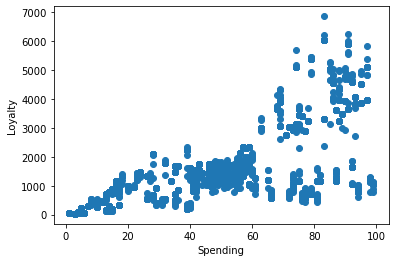

In [10]:
# Independent variable.

y=rev_clean['loyalty_points']

# Dependent variable.

x_spend=rev_clean['spending_score']

# Check for linearity with Matplotlib and add labels
plt.scatter(x_spend, y)
plt.xlabel("Spending")
plt.ylabel("Loyalty")

plt

In [11]:
# OLS model and summary.
f = 'y ~ x_spend'
reg_1 = ols(f, data = rev_clean).fit()

# Print the regression table.
reg_1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        14:51:26   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
x_spend       33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print("Parameters: ", reg_1.params) 

# Extract the standard errors.
print("Standard errors: ", reg_1.bse)  

# Extract the predicted values.
print("Predicted values: ", reg_1.predict())  

Parameters:  Intercept   -75.052663
x_spend      33.061693
dtype: float64
Standard errors:  Intercept    45.930554
x_spend       0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [13]:
# Set the X coefficient and the constant to generate the regression table.

y_pred_spend = -75.052663 + 33.061693 * rev_clean['spending_score']

# View the output.

y_pred_spend

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

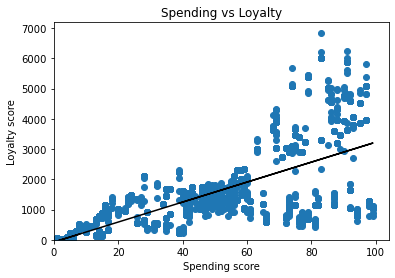

In [14]:
# Plot the graph with a regression line.

# Plot the data points with a scatterplot.
plt.scatter(x_spend, y)

# Plot the regression line (in black).
plt.plot(x_spend, y_pred_spend, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Give title & labels
plt.title("Spending vs Loyalty")
plt.xlabel("Spending score")
plt.ylabel("Loyalty score")

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

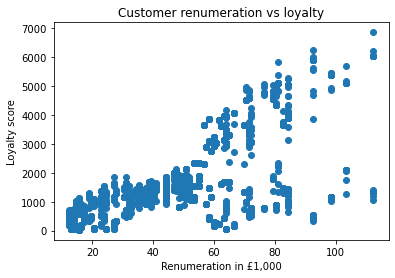

In [15]:
# Independent variable.

y=rev_clean['loyalty_points']

# Dependent variable.

x_renum=rev_clean['renumeration']

# Check for linearity with Matplotlib.
plt.scatter(x_renum, y)

# Give title & labels
plt.title("Customer renumeration vs loyalty")
plt.xlabel("Renumeration in £1,000")
plt.ylabel("Loyalty score")

plt

In [16]:
# OLS model and summary.
f_2 = 'y ~ x_renum'
reg_2 = ols(f_2, data = rev_clean).fit()

# Print the regression table.
reg_2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 21 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        14:51:26   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
x_renum       34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", reg_2.params) 

# Extract the standard errors.
print("Standard errors: ", reg_2.bse)  

# Extract the predicted values.
print("Predicted values: ", reg_2.predict())  


Parameters:  Intercept   -65.686513
x_renum      34.187825
dtype: float64
Standard errors:  Intercept    52.170717
x_renum       0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the X coefficient and the constant to generate the regression table.

y_pred_renum = -65.686513 + 34.187825 * rev_clean['renumeration']

# View the output.

y_pred_renum

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: renumeration, Length: 2000, dtype: float64

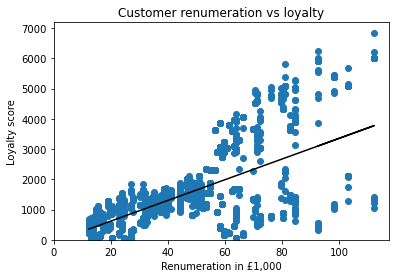

In [19]:
# Plot the data points with a scatterplot.
plt.scatter(x_renum, y)

# Plot the regression line (in black).
plt.plot(x_renum, y_pred_renum, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# Give title & labels
plt.title("Customer renumeration vs loyalty")
plt.xlabel("Renumeration in £1,000")
plt.ylabel("Loyalty score")

# View the plot.
plt.show()


### 5c) age vs loyalty

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

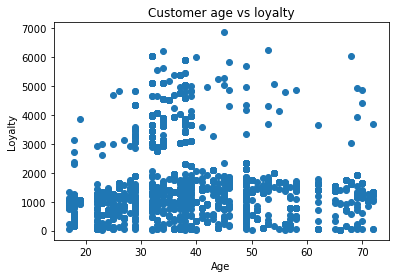

In [20]:
# Independent variable.

y=rev_clean['loyalty_points']

# Dependent variable.

x_age=rev_clean['age']

# Check for linearity with Matplotlib.
plt.scatter(x_age, y)

# Add title and labels
plt.title("Customer age vs loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty")

plt

In [21]:
# OLS model and summary.
f_3 = 'y ~ x_age'
reg_3 = ols(f_3, data = rev_clean).fit()

# Print the regression table.
reg_3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0577
Time:                        14:51:27   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
x_age         -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
# Extract the estimated parameters.
print("Parameters: ", reg_3.params) 

# Extract the standard errors.
print("Standard errors: ", reg_3.bse)  

# Extract the predicted values.
print("Predicted values: ", reg_3.predict())  


Parameters:  Intercept    1736.517739
x_age          -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
x_age         2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [23]:
# Set the X coefficient and the constant to generate the regression table.

y_pred_age = 1736.517739 - 4.012805 * rev_clean['age']

# View the output.

y_pred_age

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

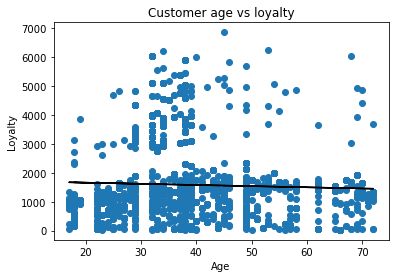

In [24]:
# Plot the data points with a scatterplot.
plt.scatter(x_age, y)

# Plot the regression line (in black).
plt.plot(x_age, y_pred_age, color='black')

# Give title & labels
plt.title("Customer age vs loyalty")
plt.xlabel("Age")
plt.ylabel("Loyalty")

# View the plot.
plt.show()


## 6. Observations and insights

In this chaprter I have done initial analysis of the data provided by Turtle Games. I have reviewed the data, checked for missing values, removed unnecessary columns and regressed customer loyalty points against three variables: age, renumeration and customer spending.

Starting with the spending, there is a strong, statistically significant (p value of slope = 0 to 3 decimals points) relationship between it and loyalty points. That makes sense, given in metadata, there is an explanation which states that loyalty points are based on customer spendings. Regression seems to confirm that, although it is worth noting that relationship becomes weaker as spending reach high levels. Possible solution could be due to bonus points or other incentives awarded to high earners.

Looking at renumeration (total income per customer), I found a strong and significant positive relation (p value of the slope is zero) between the variable and loyalty points. Given loyalty points and spendings are correlated, and capacity to spend depends on each infividual wealth, that makes sense. The more customer earns, the more he is likely to spend. For every 10k of extra income, loyalty points improve on averge by 341.

Lastly, when age and loyalty points are regressed together, there seems to be no statistically significant (at 5%) linear relationship between both. Age does not seemt to be a good predictor of loyalty and spending.






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [25]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the CSV file(s) as df2.
df2= pd.read_csv('turtle_reviews.csv')

# View the DataFrame
df2.head(5)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [27]:
# Rename the column headers
df2.rename(columns={'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'}, inplace=True)

# Drop unnecessary columns.
df2=df2[['remuneration','spending_score']]

# View DataFrame.
df2.head()

remuneration  spending_score
0         12.30              39
1         12.30              81
2         13.12               6
3         13.12              77
4         13.94              40

In [28]:
# Explore the data.
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


In [29]:
# Descriptive statistics.
df2.describe()

remuneration  spending_score
count   2000.000000     2000.000000
mean      48.079060       50.000000
std       23.123984       26.094702
min       12.300000        1.000000
25%       30.340000       32.000000
50%       47.150000       50.000000
75%       63.960000       73.000000
max      112.340000       99.000000

## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

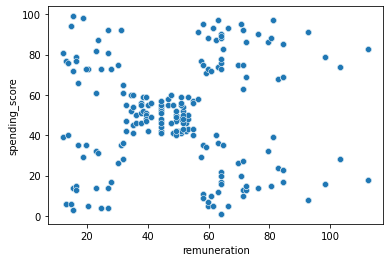

In [30]:
# Create a scatterplot with Seaborn.

sns.scatterplot(x='remuneration', y='spending_score', data=df2)

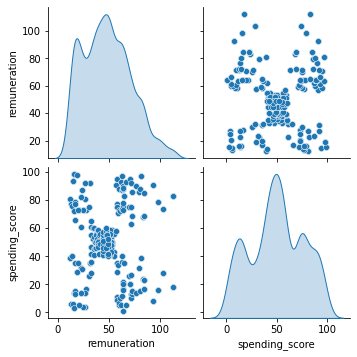

In [31]:
# Create a pairplot with Seaborn.
sns.pairplot(df2,
             vars=df2,
             diag_kind='kde')

## 3. Elbow and silhoutte methods

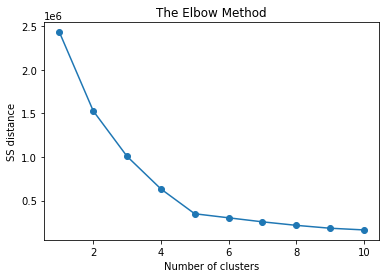

In [32]:
# Determine the number of clusters: Elbow method.

# Create an empty list ss to store different cluster sizes
ss=[]

# Employ a loop to test each cluster size

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(df2)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1,11),ss, marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

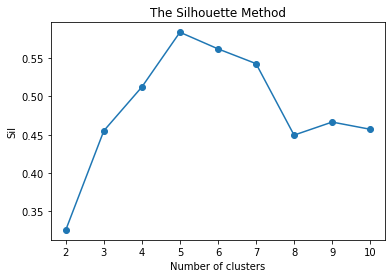

In [33]:
# Determine the number of clusters: Silhouette method.

# Create an empty list and set the maximum number of clsuters
sil=[]
kmax=10

# Employ silhuette method

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(df2)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(df2,
                                labels,
                                metric='euclidean'))
    
# Plot the elbow method.
plt.plot(range(2, 11),sil, marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

<B>Looking at Silhouette and the elbow method together with visual inspection (visually disctintable 5 groups of observation) I decided to just run k-means model with k=5 as it seems strongly to have an optimal parameters</B>

## 4. Evaluate k-means model at different values of *k*

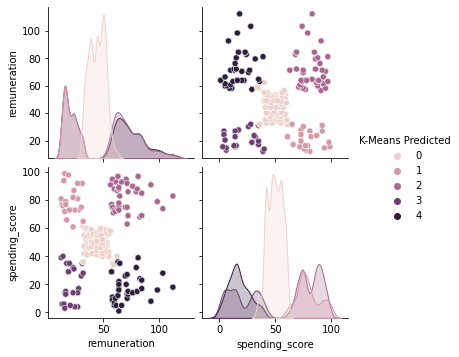

In [34]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(df2)

clusters = kmeans.labels_
df2['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(df2,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [35]:
# Check the number of observations per predicted class.
df2['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 5. Plot and interpret the clusters

[Text(0.5, 1.0, 'Customer groups')]

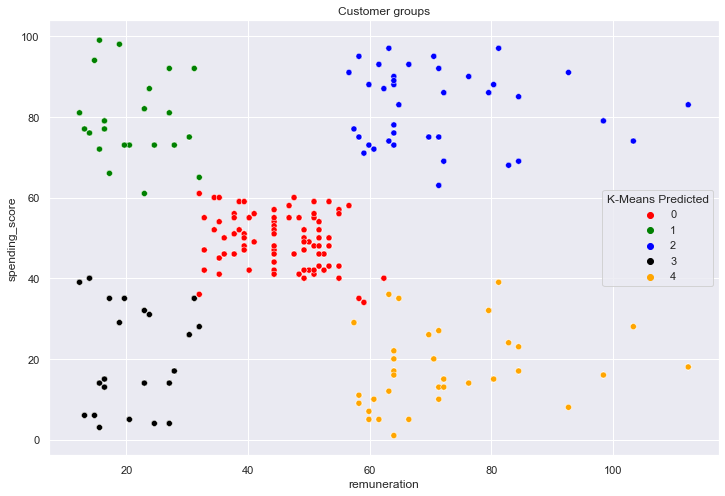

In [36]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=df2,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black','orange']).set(title='Customer groups')


# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [37]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [38]:
# Load the CSV file(s) as df3.
df3= pd.read_csv('turtle_reviews.csv')

# View the DataFrame
df3.head(5)

gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [39]:
# Drop unnecessary columns.
df3=df3[['review','summary']]

# View DataFrame.
df3.head()

review  \
0  When it comes to a DM's screen, the space on t...   
1  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2  Nice art, nice printing.  Why two panels are f...   
3  Amazing buy! Bought it as a gift for our new d...   
4  As my review of GF9's previous screens these w...   

                                             summary  
0  The fact that 50% of this space is wasted on a...  
1  Another worthless Dungeon Master's screen from...  
2                    pretty, but also pretty useless  
3                                         Five Stars  
4                                         Money trap

In [40]:
# Explore data set
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   review   2000 non-null   object
 1   summary  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [41]:
# Review column: Change all to lower case and join with a space.
df3['review'] = df3['review'].\
apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [42]:
# Summary column: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].\
apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [43]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]','')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [44]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]','')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [45]:
# Create a new column with boolean showing duplicated or not, considering duplicates in 
# both review and summary column
df3['duplicated']=df3.duplicated()
df3.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  duplicated  
0  the fact that 50 of this space is wasted on ar...       False  
1  another worthless dungeon masters screen from ...       False  
2                     pretty but also pretty useless       False  
3                                         five stars       False  
4                                         money trap       False

In [46]:
# Visually analyse duplicates
print(df3.loc[df3['duplicated'] == True].shape)
df3.loc[df3['duplicated'] == True].sort_values(by=['review'])

(39, 3)


review     summary  duplicated
1651                      as expected  five stars        True
1553                      as expected  five stars        True
1037                          awesome  five stars        True
1577                     awesome game  five stars        True
1322                   best game ever  five stars        True
1531                             cute  five stars        True
1926                         fun game  five stars        True
1933                             good  five stars        True
404                              good  five stars        True
1186                             good  five stars        True
1938                        good game  five stars        True
1849                     good product  five stars        True
1544                            great  five stars        True
94                              great  five stars        True
371                             great  five stars        True
576                             great  five stars        True
408                             great  five stars        True
1441       great addition to the game  five stars        True
1414  great expansion to a great game  five stars        True
1897                great family game  five stars        True
1863                       great game  five stars        True
810                        great game  five stars        True
811                        great game  five stars        True
1006                       great game  five stars        True
1949                       great game  five stars        True
979                        great game  five stars        True
1050                       great game  five stars        True
1013                        i love it  five stars        True
1382                          love it  five stars        True
326                           love it  five stars        True
430                           love it  five stars        True
416                           love it  five stars        True
959                           love it  five stars        True
1540                          love it  five stars        True
1713                       love these  five stars        True
1145                             nice  five stars        True
1972                               ok  five stars        True
1155             ontime and nice item  five stars        True
1545                        very cute  five stars        True

After a visual inspection - we are fine to remove the above duplicates

In [47]:
# Drop duplicates in both columns keeping last occurance
df3 = df3.drop_duplicates(keep='last')

In [48]:
# Check that the process run correctly
df3.loc[df3['duplicated'] == True].sort_values(by=['review'])

review     summary  duplicated
1651                      as expected  five stars        True
1037                          awesome  five stars        True
1577                     awesome game  five stars        True
1322                   best game ever  five stars        True
1531                             cute  five stars        True
1926                         fun game  five stars        True
1933                             good  five stars        True
1938                        good game  five stars        True
1849                     good product  five stars        True
1544                            great  five stars        True
1441       great addition to the game  five stars        True
1414  great expansion to a great game  five stars        True
1897                great family game  five stars        True
1949                       great game  five stars        True
1013                        i love it  five stars        True
1540                          love it  five stars        True
1713                       love these  five stars        True
1145                             nice  five stars        True
1972                               ok  five stars        True
1155             ontime and nice item  five stars        True
1545                        very cute  five stars        True

Process seemed to run correctly. The above entries have same 'summary' but different 'review' columns

In [49]:
# Double-check the number of duplicate values in the both columns.
df3.duplicated().sum()

0

Process of removal duplicates run correctly

In [50]:
# Drop boolean column 'duplicated' and preview data.
df3=df3[['review','summary']]
df3.reset_index(inplace=True, drop=True)
df3.tail()

review  \
1977  the perfect word game for mixed ages with mom ...   
1978  great game did not think i would like it when ...   
1979           great game for all keeps the mind nimble   
1980                                           fun game   
1981  this game is fun a lot like scrabble without a...   

                                            summary  
1977  the perfect word game for mixed ages with mom  
1978                                      super fun  
1979                                     great game  
1980                                     four stars  
1981                                 love this game

## 3. Tokenise and create wordclouds

In [51]:
# Create new DataFrame (copy DataFrame).
df4=df3
# View DataFrame.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9 your unpainted mi...   
2     nice art nice printing why two panels are fill...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1977  the perfect word game for mixed ages with mom ...   
1978  great game did not think i would like it when ...   
1979           great game for all keeps the mind nimble   
1980                                           fun game   
1981  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1977      the perfect word game for mixed ages with mom  
1978                                          super fun  
1979                                         great game  
1980                                         four stars  
1981                                     love this game  

[1982 rows x 2 columns]

In [52]:
# Apply tokenisation to both columns.
df4['tokens_review'] = df4['review'].apply(word_tokenize)
df4['tokens_summary'] = df4['summary'].apply(word_tokenize)

# View DataFrame.
df4.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      tokens_summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [53]:
df4.tail()

review  \
1977  the perfect word game for mixed ages with mom ...   
1978  great game did not think i would like it when ...   
1979           great game for all keeps the mind nimble   
1980                                           fun game   
1981  this game is fun a lot like scrabble without a...   

                                            summary  \
1977  the perfect word game for mixed ages with mom   
1978                                      super fun   
1979                                     great game   
1980                                     four stars   
1981                                 love this game   

                                          tokens_review  \
1977  [the, perfect, word, game, for, mixed, ages, w...   
1978  [great, game, did, not, think, i, would, like,...   
1979  [great, game, for, all, keeps, the, mind, nimble]   
1980                                        [fun, game]   
1981  [this, game, is, fun, a, lot, like, scrabble, ...   

                                         tokens_summary  
1977  [the, perfect, word, game, for, mixed, ages, w...  
1978                                       [super, fun]  
1979                                      [great, game]  
1980                                      [four, stars]  
1981                                 [love, this, game]

In [54]:
# Review: Create a word cloud.

# String all the reviews together in a single variable.
all_reviews = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_reviews = all_reviews + " " +df4['review'][i]
    
# Inspect the outcome
all_reviews

' when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9 your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could

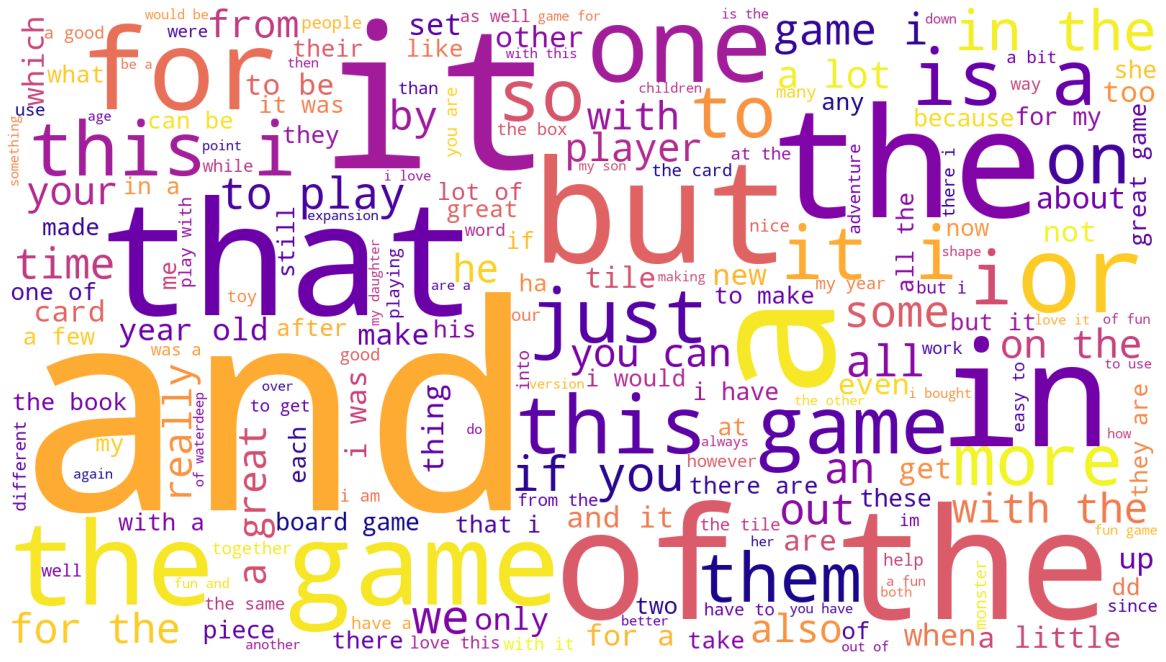

In [55]:
# Review: WordCloud image.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

As expected, the WordCloud is full of stopwords. They will need to be removed to get any proper sense of the reviews (to be done in later part of the assignment)

In [56]:
# Summary: Create a word cloud.

# String all the reviews together in a single variable.
all_summaries = ''
for i in range(df4.shape[0]):
    # Add each comment.
    all_summaries = all_summaries + " " + df4['summary'][i]
    
# Inspect the outcome
all_summaries


' the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars 

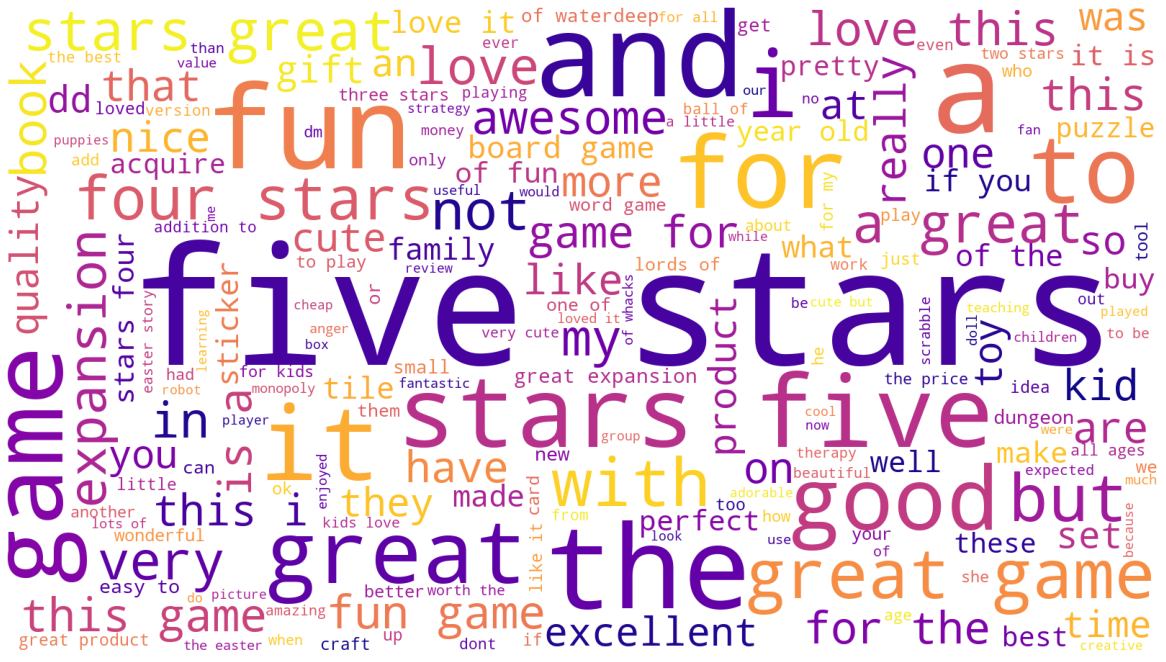

In [57]:
# Summary: WordCloud image.

# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object.
word_cloud2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_summaries) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()



A bit more clarity than in the case of "review" column. "Five" and "Stars" seem to be one of the most often used words potentially implying 5stars (very good) reviews of the product. There are some stopwords, but not as frequent as in the case of "review" word cloud.

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

#### Frequency distribution - reviews

In [58]:
# Define an empty list of tokens for review
all_tokens_review = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df4['tokens_review'][i]


#Calculate the frequency distribution.
fdist_review = FreqDist(all_tokens_review)

# Preview data.
fdist_review

FreqDist({'the': 5452, 'and': 3234, 'to': 3164, 'a': 3161, 'of': 2488, 'i': 2091, 'it': 2085, 'is': 1782, 'this': 1776, 'game': 1679, ...})

#### Frequency distribution - summary

In [59]:
# Define an empty list of tokens for review
all_tokens_summary = []

for i in range(df4.shape[0]):
    # Add each token to the list.
    all_tokens_summary = all_tokens_summary + df4['tokens_summary'][i]


#Calculate the frequency distribution.
fdist_summary = FreqDist(all_tokens_summary)

# Preview data.
fdist_summary

FreqDist({'stars': 448, 'five': 363, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

Above results aling with Wordcloud

### 4b) Remove alphanumeric characters and stopwords

In [60]:
# Delete all the alpanum in reviews tokens
all_tokens_review = [word for word in all_tokens_review if word.isalnum()]

# Delete all the alpanum in summary tokens
all_tokens_summary = [word for word in all_tokens_summary if word.isalnum()]


In [61]:
# Remove all the stopwords

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of review tokens without stop words.
all_tokens_review = [x for x in all_tokens_review if x.lower() not in english_stopwords]

# Create a filtered list of summary tokens without stop words.
all_tokens_summary = [x for x in all_tokens_summary if x.lower() not in english_stopwords]

In [62]:
# Move tokens back to a string - for review

# Define an empty string variable.
all_review2 = ''

for value in all_tokens_review:
    # Add each filtered token word to the string.
    all_review2 = all_review2 + value + ' '
    
all_review2

'comes dms screen space screen absolute premium fact 50 space wasted art terribly informative needed art well makes completely useless reason gave 2 stars 1 technically speaking least still stand block notes dice rolls drops ball completely open letter galeforce9 unpainted miniatures bad spell cards great board games meh dm screens however freaking terrible im still waiting single screen isnt polluted pointless artwork useful referenceable tables youve created single use screen useful running storm kings thunder adventure even despite fact geared adventure path usefulness negligible best massive swath inner panel wasted artwork bloated overland map could easily reduced single panel size table nighuseless short stop making crap dm screens nice art nice printing two panels filled general forgotten realms map beyond one blue ocean waste dont understand cant make dm screens useful kinds adventures rather solely specific adventure youre supposed able transpose adventure lands outside forgot

In [63]:
# Move tokens back to a string - for summary

# Define an empty string variable.
all_summary2 = ''

for value in all_tokens_summary:
    # Add each filtered token word to the string.
    all_summary2 = all_summary2 + value + ' '
    
all_summary2

'fact 50 space wasted art terribly informative needed art another worthless dungeon masters screen galeforce9 pretty also pretty useless five stars money trap five stars best gm screen ever five stars great could even better another missed opportunity value add product line five stars love map general dm screen weak game fell completely flat five stars good book buckley card mommer advanced good gets better know youre getting dont bother worst value ive ever seen enough product good product temporary tattoos good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done relaxation beautiful coloring book pictures great ive done one gave great buy cant wait work book stained glass perfection four stars beautiful great pictures nice five stars five stars five stars five stars five stars five stars four stars three stars like every image contained stained glass coloring book creative stained glass pictures nice pictures

### 4c) Create wordcloud without stopwords

#### Wordcloud - reviews

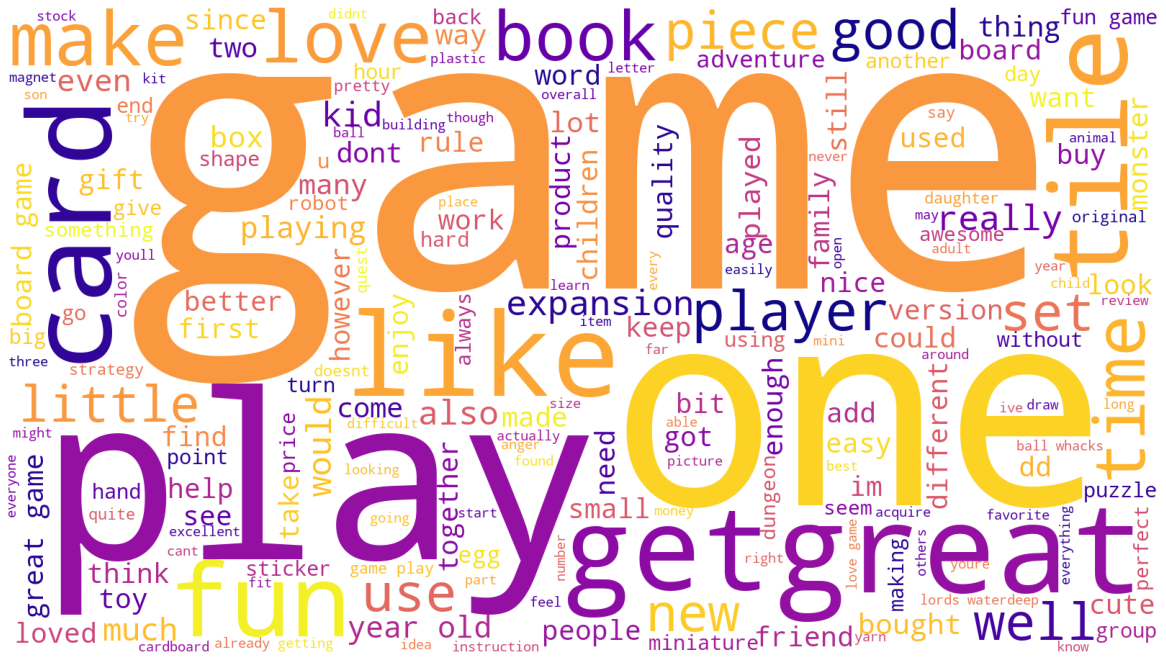

In [64]:
# Create a wordcloud without stop word 

# Create a WordCloud object.
word_cloud3 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                min_font_size = 10).generate(all_review2) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud3) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

#### Wordcloud - summary


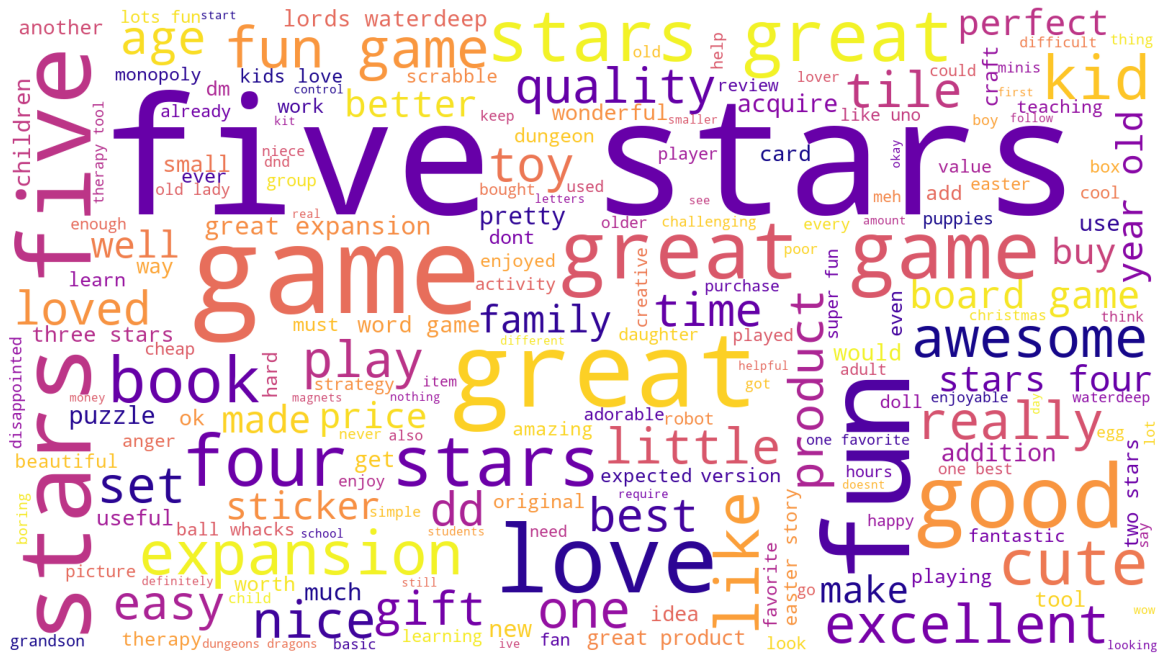

In [65]:
# Create a WordCloud object.
word_cloud4 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',     
                min_font_size = 10).generate(all_summary2) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud4) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

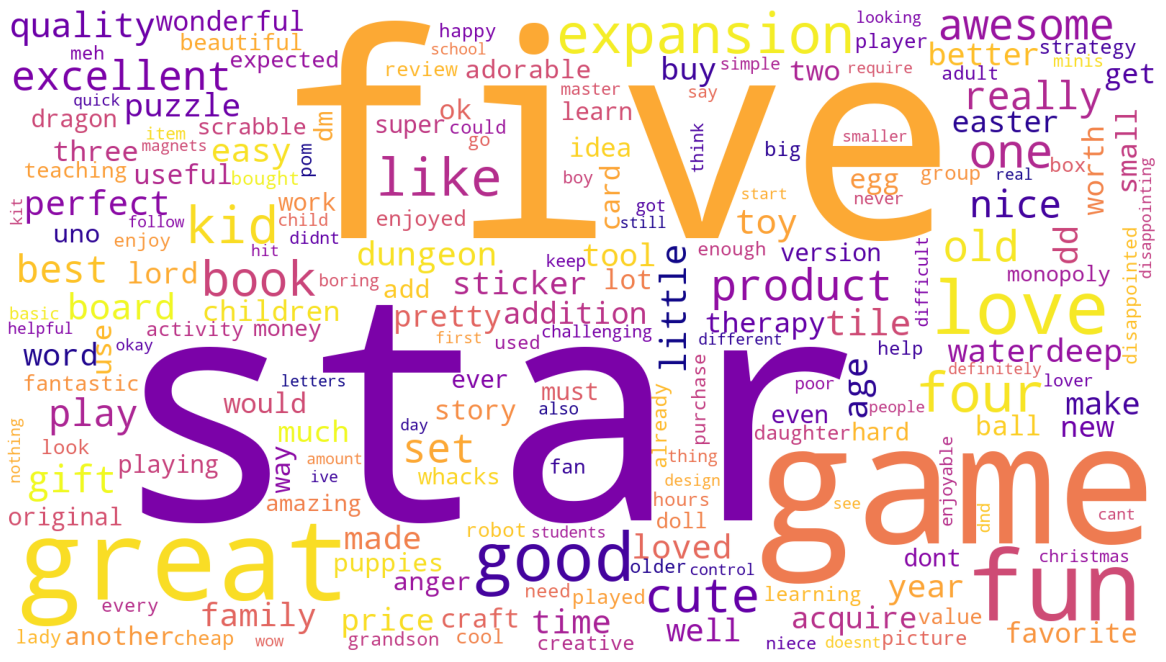

In [66]:
"""Create another wordcloud for Summary. This time with collocation = False. Collocation in WordCloud project 
set frequently used two words (bigrams) as one word. 
This causes duplication in the above of words 'five' 'stars' etc"""

word_cloud5 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'plasma', 
                stopwords = 'none',
                collocations=False,
                min_font_size = 10).generate(all_summary2) 

# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(word_cloud5) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

Without the collocation, the wordcloud of summaries is much more informative and clear. It indicates positve sentiment towards the developer (words like "five, "star", "fun", "great", "love" are frequently used).

In [67]:
# See frequency distribution for each word in tokens

fdist_summary = FreqDist(all_tokens_summary)
fdist_summary

FreqDist({'stars': 448, 'five': 363, 'game': 319, 'great': 295, 'fun': 218, 'love': 93, 'good': 92, 'four': 58, 'like': 54, 'expansion': 52, ...})

### 4d) Identify 15 most common words and polarity

In [68]:
# Determine the 15 most common words - reviews

# Generate a DataFrame from Counter.
counts_review = pd.DataFrame(Counter(all_tokens_review).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_review.transpose()

Word       game  great  fun  one  play  like  love  really  get  cards  tiles  \
Frequency  1679    586  553  530   502   414   326     319  319    301    297   

Word       good  time  would  book  
Frequency   292   291    280   273

In [69]:
# Determine the 15 most common words - summary

# Generate a DataFrame from Counter.
counts_summary = pd.DataFrame(Counter(all_tokens_summary).most_common(15),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
counts_summary.transpose()


Word       stars  five  game  great  fun  love  good  four  like  expansion  \
Frequency    448   363   319    295  218    93    92    58    54         52   

Word       kids  cute  book  one  awesome  
Frequency    50    45    43   38       36

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [70]:
# Provided function - polatity
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]


In [71]:
# View the dataFrame again
df4.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9 your unpainted mi...   
2  nice art nice printing why two panels are fill...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  \
0  the fact that 50 of this space is wasted on ar...   
1  another worthless dungeon masters screen from ...   
2                     pretty but also pretty useless   
3                                         five stars   
4                                         money trap   

                                       tokens_review  \
0  [when, it, comes, to, a, dms, screen, the, spa...   
1  [an, open, letter, to, galeforce9, your, unpai...   
2  [nice, art, nice, printing, why, two, panels, ...   
3  [amazing, buy, bought, it, as, a, gift, for, o...   
4  [as, my, review, of, gf9s, previous, screens, ...   

                                      tokens_summary  
0  [the, fact, that, 50, of, this, space, is, was...  
1  [another, worthless, dungeon, masters, screen,...  
2               [pretty, but, also, pretty, useless]  
3                                      [five, stars]  
4                                      [money, trap]

In [72]:
# Determine polarity of both columns. 

df4['polarity_review'] = df4['review'].apply(generate_polarity)
df4['polarity_summary'] = df4['summary'].apply(generate_polarity)

# View output.

print(df4['polarity_review'].head())
print(df4['polarity_summary'].head())

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64
0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64


In [73]:
# Print mediam/mean for review column

print(df4['polarity_review'].mean())
print(df4['polarity_review'].median())

0.2155282019641704
0.1788690476190476


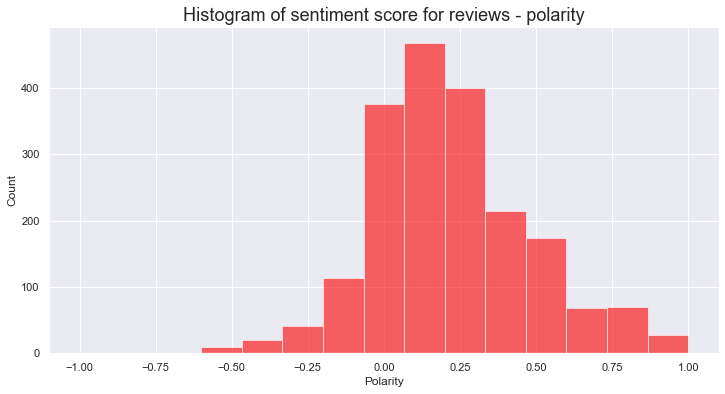

In [74]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(12,6))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_review'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score for reviews - polarity', fontsize=18)

plt.show()

# Histogram of sentiment score


In [75]:
# Print mediam/mean for review column

print(df4['polarity_summary'].mean())
print(df4['polarity_summary'].median())

0.22130840033242957
0.08819444444444446


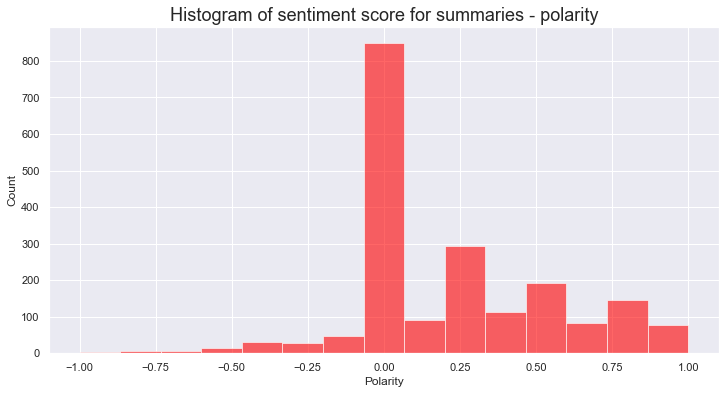

In [76]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(12,6))

# Define the bars.
n, bins, patches = plt.hist(df4['polarity_summary'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score for summaries - polarity', fontsize=18)

plt.show()

# Histogram of sentiment score


Interesting that the polarity score for summaries is mostly neutral. Possible reason is that algorithm does not recognise statements like "Five stars" as truly positive and treats each word separately, hence giving statement neutral polarity score. Let's test that theory.

In [77]:
# Check polarity score for statement 'five stars'
print(TextBlob('Five stars').sentiment)

# Check polarity score for statement 'four stars'
print(TextBlob('Four stars').sentiment)

Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)


In [78]:
# Double check assigned polarity for summmary 'five stars' and 'four stars' in the dataframe
df4.loc[df4['summary'].isin(['five stars','four stars'])]

review     summary  \
3     amazing buy bought it as a gift for our new dm...  five stars   
5                                        grandson loves  five stars   
7                             came in perfect condition  five stars   
10                                      works very well  five stars   
15                          very fun game for my family  five stars   
...                                                 ...         ...   
1958                                        it is great  five stars   
1962                         nice easy game fun for all  four stars   
1967              such a fun game our families favorite  five stars   
1973                              addicted to this game  five stars   
1980                                           fun game  four stars   

                                          tokens_review tokens_summary  \
3     [amazing, buy, bought, it, as, a, gift, for, o...  [five, stars]   
5                                     [grandson, loves]  [five, stars]   
7                        [came, in, perfect, condition]  [five, stars]   
10                                  [works, very, well]  [five, stars]   
15                   [very, fun, game, for, my, family]  [five, stars]   
...                                                 ...            ...   
1958                                    [it, is, great]  [five, stars]   
1962                  [nice, easy, game, fun, for, all]  [four, stars]   
1967      [such, a, fun, game, our, families, favorite]  [five, stars]   
1973                         [addicted, to, this, game]  [five, stars]   
1980                                        [fun, game]  [four, stars]   

      polarity_review  polarity_summary  
3            0.578788               0.0  
5            0.000000               0.0  
7            1.000000               0.0  
10           0.200000               0.0  
15          -0.005000               0.0  
...               ...               ...  
1958         0.800000               0.0  
1962         0.233333               0.0  
1967         0.100000               0.0  
1973        -0.400000               0.0  
1980        -0.050000               0.0  

[417 rows x 6 columns]

<b>The theory was correct</b>

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [79]:
# Top 20 negative reviews.
negative_sentiment_review = df4.nsmallest(20, 'polarity_review')

# Eliminate unnecessary columns.
negative_sentiment_review = negative_sentiment_review[['review', 'polarity_review']]

# Adjust the column width.
negative_sentiment_review.style.set_properties(subset=['review'], **{'width': '1200px'})

In [80]:
# Top 20 negative summaries.
negative_sentiment_summary = df4.nsmallest(20, 'polarity_summary')

# Eliminate unnecessary columns.
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polarity_summary']]

# Adjust the column width.
negative_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '600px'})

Note: TextBlob algorithm is not perfect. Word "disappointed" and "disappointing" got different polarity scores whereas in reality they show the same sentiment

In [81]:
# Top 20 positive reviews.
positive_sentiment_review = df4.nlargest(20, 'polarity_review')

# Eliminate unnecessary columns.
positive_sentiment_review = positive_sentiment_review[['review', 'polarity_review']]

# Adjust the column width.
positive_sentiment_review.style.set_properties(subset=['review'], **{'width': '600px'})

In [82]:
# Top 20 positive summaries.
positive_sentiment_summary = df4.nlargest(20, 'polarity_summary')

# Eliminate unnecessary columns.
positive_sentiment_summary = positive_sentiment_summary[['summary', 'polarity_summary']]

# Adjust the column width.
positive_sentiment_summary.style.set_properties(subset=['summary'], **{'width': '600px'})

Again - TexlBlob algorithm is not perfect. Looking at the last entry (index: 654), "not the best quality" is identified with maximum positive sentiment of 1. In reality statement is not so positive.

## 7. Discuss: Insights and observations

Notwithstanding imperfect nature of the nltk algorith, the sentiment towards Turtle Games has been found to be in general positive with reviews like "five stars" dominating customer feedback

# 